In [1]:
import cv2
import math
import numpy as np
import mediapipe as mp

from PIL import Image
from mediapipe.tasks import python
from matplotlib import pyplot as plt
from mediapipe.tasks.python import vision
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


In [2]:

# cap = cv2.VideoCapture(0)
# ret, frame = cap.read()

In [3]:
# pil_img = Image.fromarray(frame[:,:,::-1])
# pil_img

In [4]:
image = mp.Image.create_from_file('test.png')

In [5]:

# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options,num_hands=2)
recognizer = vision.GestureRecognizer.create_from_options(options)


In [6]:
# STEP 4: Recognize gestures in the input image.
recognition_result = recognizer.recognize(image)

# STEP 5: Process the result. In this case, visualize it.
top_gesture = recognition_result.gestures[0][0]

In [16]:
recognition_result.hand_landmarks[0][8]

NormalizedLandmark(x=0.5275169014930725, y=0.30961230397224426, z=-0.15810398757457733, visibility=0.0, presence=0.0)

In [8]:
recognition_result.gestures[0][0].category_name

'Pointing_Up'

In [9]:
annotated_image = image.numpy_view().copy()
for hand_landmarks in recognition_result.hand_landmarks:
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    mp_drawing.draw_landmarks(
    annotated_image,
    hand_landmarks_proto,
    mp_hands.HAND_CONNECTIONS,
    mp_drawing_styles.get_default_hand_landmarks_style(),
    mp_drawing_styles.get_default_hand_connections_style())

In [10]:
top_gesture

Category(index=-1, score=0.7960013151168823, display_name='', category_name='Pointing_Up')

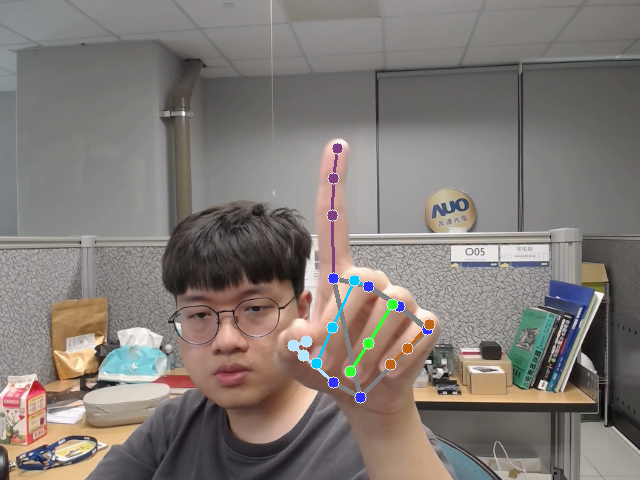

In [12]:
Image.fromarray(annotated_image)